<a href="https://colab.research.google.com/github/grant88/education/blob/main/6.machine_learning_data_science/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import cv2
import skimage

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

from skimage.metrics import structural_similarity as ssim

In [25]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2  отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

In [26]:
path = 'flower.jpg'

128, 128, 3


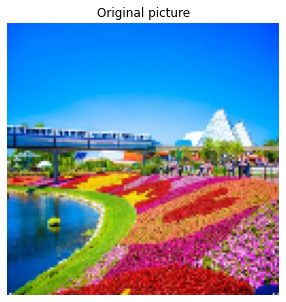

In [120]:
img = cv2.imread(path)
original_image = cv2.resize(img, (128, 128))
height, width, dim = original_image.shape
print(f"{height}, {width}, {dim}")
X = original_image.reshape((height * width, dim))
draw_picture(original_image, 'Original picture')

KMeans
AgglomerativeClustering


Clasterization model: KMeans


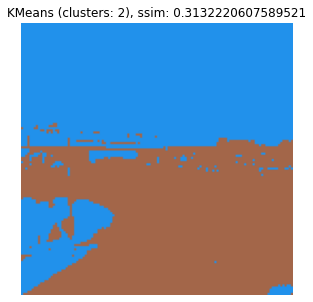

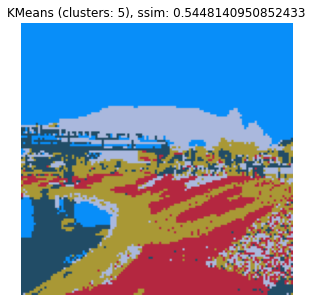

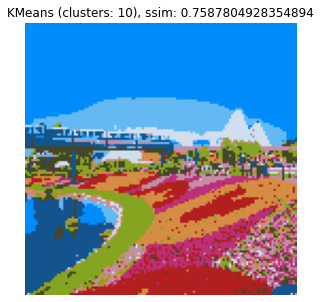

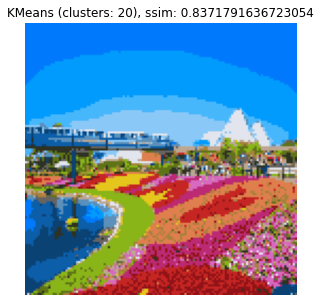

Clasterization model: AgglomerativeClustering


AttributeError: ignored

In [124]:
for clusterization_model in [KMeans, AgglomerativeClustering]:
    print(f"Clasterization model: {clusterization_model.__name__}")
    for n_clusters in [2, 5, 10, 20]:

        model = clusterization_model(n_clusters=n_clusters)
        model.fit(X)

        centers = np.uint8(model.cluster_centers_)
        labels = model.labels_

        result_image = np.array([centers[i] for i in labels])
        result_image.shape = original_image.shape

        ssim_value = ssim(original_image, result_image, multichannel=True)
        draw_picture(result_image, f'{clusterization_model.__name__} (clusters: {n_clusters}), ssim: {ssim_value}')

In [149]:
model = AgglomerativeClustering(n_clusters=5)

In [150]:
a = model.fit_predict(X)

In [161]:
len(a)

16384

In [152]:
model.labels_

array([1, 1, 1, ..., 2, 0, 0])

In [167]:
model.n_leaves_

16384

In [162]:
model.children_

array([[    0,   114],
       [    1,   128],
       [    2,   129],
       ...,
       [32762, 32763],
       [32761, 32764],
       [32760, 32765]])

In [110]:
model = DBSCAN(eps=5)

In [111]:
#scaled = StandardScaler().fit_transform(reshaped)
model.fit(reshaped)

DBSCAN(eps=5)

In [112]:
labels = model.labels_

In [113]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [114]:
model.labels_

array([ 0,  0,  0, ..., -1, -1, -1])

In [115]:
n_clusters_, n_noise_, n_noise_+n_clusters_

(105, 6245, 6350)

In [116]:
res = np.array([model.components_[i] for i in labels])

In [117]:
res.shape = img.shape

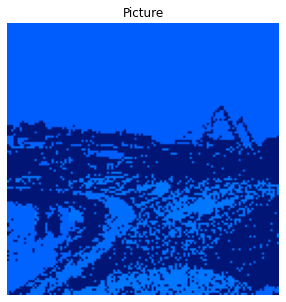

In [118]:
draw_picture(res, 'Picture')